# 0 - Using pycoco to Generate Lightcurves
___
CoCo is a tool to generate Core-Collapse Supernova lightcurves using spectrophotometric templates, based on a sample of 30 Stripped-Envelope SNe. This set of notebooks (and module) basically assume that you have this installed - if not, head to [https://github.com/UoS-SNe/CoCo](https://github.com/UoS-SNe/CoCo) and follow the instructions.

## Brief description of operation
___
![flowchart](data/pycoco_flowchart.png)

## Prerequisites
___
There are three environment variables you need to have set before `pycoco` will work properly:

* `COCO_ROOT_DIR` (my default is `${HOME}/Code/CoCo/`)
* `SFD_DIR` (this points to dust maps for extincting simulations - my default is `${HOME}/data/Dust/sfddata-master/` - see https://github.com/kbarbary/sfdmap for detailed instructions, including where to download the maps)
* `LSST_THROUGHPUTS`  (my default is `${HOME}/projects/LSST/throughputs` - this needs to point at a clone of [https://github.com/lsst/throughputs](https://github.com/lsst/throughputs)) 


The `CoCo` cython simulation module also needs to be built. Run:

```python setup.py build_ext --inplace```

_note_: `COCO_ROOT_DIR` should also be in your path 

This creates the module `pyCoCo` (_note caps_) which I'll be importing as `pccsims`. 

## Testing `pycoco`

Assuming you have done the above, you can check the install by running the bundled tests:

In [1]:
import pycoco as pcc

pcc.testing.runtests()

test_BaseSpectrumClass_get_list_dir_returns_default (pycoco.testing.TestClass) ... ok
test_COCO_ROOT_DIR_environment_variable_exists (pycoco.testing.TestClass) ... ok
test_COCO_ROOT_DIR_exists (pycoco.testing.TestClass) ... ok
test_LSST_THROUGHPUTS_BASELINE_DIR_exists (pycoco.testing.TestClass) ... ok
test_LSST_THROUGHPUTS_DIR_exists (pycoco.testing.TestClass) ... ok
test_LSST_THROUGHPUTS_environment_variable_exists (pycoco.testing.TestClass) ... ok
test_PYCOCO_DATA_DIR_exists (pycoco.testing.TestClass) ... ok
test_PYCOCO_FILTER_DIR_exists (pycoco.testing.TestClass) ... ok
test_PhotometryClass_1993J_phot_size (pycoco.testing.TestClass) ... ok
test_PhotometryClass_get_1993J (pycoco.testing.TestClass) ... 

Running test suite:



ok
test_PhotometryClass_get_and_plot_1993J (pycoco.testing.TestClass) ... ok
test_PhotometryClass_get_data_dir_returns_default (pycoco.testing.TestClass) ... ok
test_SFD_DIR_environment_variable_exists (pycoco.testing.TestClass) ... ok
test_SFD_DIR_exists (pycoco.testing.TestClass) ... ok
test_SpectrumClass_get_data_dir_returns_default (pycoco.testing.TestClass) ... ok
test_SpectrumClass_get_specphot_works_with_many_requested_and_many_overlapping_filters (pycoco.testing.TestClass) ... ok
test_SpectrumClass_get_specphot_works_with_one_requested_and_many_overlapping_filters (pycoco.testing.TestClass) ... ok
test_SpectrumClass_get_specphot_works_with_one_requested_and_one_overlapping_filter (pycoco.testing.TestClass) ... ok
test_check_dir_path_finds_pycoco_dir (pycoco.testing.TestClass) ... ok
test_check_dir_path_raises_PathError_for_None (pycoco.testing.TestClass) ... ok
test_check_dir_path_raises_PathError_for_file (pycoco.testing.TestClass) ... ok
test_check_file_path_finds_SN2005bf (p

iPTF13bvn.list  passed
SN1993J.list  passed
SN1994I.list  passed
SN1996cb.list  passed
SN1998bw.list  passed
SN1999dn.list  passed
SN2002ap.list  passed
SN2003jd.list  passed
SN2004aw.list  passed
SN2005bf.list  passed
SN2005hg.list  passed
SN2006aj.list  passed
SN2007C.list  passed
SN2007gr.list  passed
SN2007uy.list  passed
SN2007Y.list  passed
SN2008ax.list  passed
SN2008bo.list  passed
SN2008D.list  passed
SN2009bb.list  passed
SN2009er.list  passed
SN2009iz.list  passed
SN2009jf.list  passed
SN2010al.list  passed
SN2010as.list  passed
SN2011bm.list  passed
SN2011dh.list  passed
SN2011ei.list  passed
SN2011fu.list  passed
SN2012ap.list  passed
SN2013ge.list  passed
SN2015U.list  passed
/Users/berto/projects/LSST/throughputs//baseline/darksky.dat
file exists? True
loading LSST_u
from /Users/berto/Code/CoCo/data/filters/LSST_u.dat
file exists?  True
loading LSST_g
from /Users/berto/Code/CoCo/data/filters/LSST_g.dat
file exists?  True
loading LSST_r
from /Users/berto/Code/CoCo/data/fi

ok
test_filter_default_colour (pycoco.testing.TestClass) ... ok
test_filter_default_frequency_units (pycoco.testing.TestClass) ... ok
test_filter_default_wavelength_units (pycoco.testing.TestClass) ... ok
test_filter_edge_calc (pycoco.testing.TestClass) ... ok
test_filter_name_parsed_OK (pycoco.testing.TestClass) ... 

loading LSST_y
from /Users/berto/Code/CoCo/data/filters/LSST_y.dat
file exists?  True


ok
test_find_filter_phot_finds_no_SN2011fe_data (pycoco.testing.TestClass) ... /Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/functions.py:254: UserWarning: No matches found.
  warnings.warn("No matches found.")
ok
test_find_formatted_phot_finds_SN2005bf (pycoco.testing.TestClass) ... /Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/functions.py:314: UserWarning: Found /Users/berto/Code/CoCo/data/lc/SN2005bf.dat - you could just read that in.
  warnings.warn("Found " + os.path.join(path,snname + file_type) + " - you could just read that in.")
ok
test_find_formatted_phot_finds_no_SN2011fe_data (pycoco.testing.TestClass) ... /Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/functions.py:324: UserWarning: No matches found.
  warnings.warn("No matches found.")
ok
test_find_formatted_phot_throws_path_error_for_None (pycoco.testing.TestClass) ... /Users/berto/anaconda3/lib/python3.6/site

# Simulating Lightcurves
___
This section deals with simulating lightcurves - hopefully you have the bundled fits, or have run your own (if not, now is a good time to head over to [1 - pycoco calling CoCo.ipynb](1 - pycoco calling CoCo.ipynb)).

Below is a minumum working example. Following on from that is a more realistic treatment using a subset of LSST OpSim simulations.

In [2]:
%matplotlib notebook

from matplotlib import pyplot as plt

import os
import numpy as np

import pycoco as pcc
import pyCoCo as pccsim

## Set up the Simulator Generator
___

In [3]:
fltPath = pcc.utils.b(pcc.defaults._default_filter_dir_path)
rootPath = pcc.utils.b(pcc.defaults._default_coco_dir_path)
print(fltPath)
print(rootPath)

info = pcc.classes.InfoClass()
info.load()

coco = pccsim.pyCoCo(fltPath, rootPath)

b'/Users/berto/Code/CoCo/data/filters/'
b'/Users/berto/Code/CoCo/'


# Simple LC
___
## Set Params

In [4]:
snname = "SN1998bw"             ## Name of the SN Template to use
mjdmax = 50.                    ## Time that peak set by specphase() occurs at
mjd_obs = np.arange(0.,105.,5.) ## 5 Day Cadence, single filter

filter_name = "LSST_g"                                                       ## The filters must be a np array of
filter_obs = np.array([pcc.utils.b(filter_name) for observation in mjd_obs]) ## bytestrings
                                                                             
z_sim = info.get_sn_info(snname)["z_distmod"]

absmag_offset = 0.0
EBV_MW = 0.0
EBV_host = 0.0
R_v = 3.1

## Generate Lightcurve

In [5]:
flux, flux_err = coco.simulate(pcc.utils.b(snname),
                               z_sim, 
                               absmag_offset, 
                               EBV_MW, EBV_host, R_v,
                               mjdmax, mjd_obs,
                               filter_obs)

## Load in and Inspect

In [6]:
sn_sim = pcc.classes.SNClass("SN1998bw")
sn_sim.load_phot(phot_table = pcc.utils.simulate_out_to_ap_table(mjd_obs, flux, flux_err, filter_obs))
sn_sim.phot.data

OrderedDict([('LSST_g', <Table length=21>
                MJD          flux       flux_err filter
              float64      float64      float64   str6 
              ------- ----------------- -------- ------
                  0.0 1.03523333615e-19      0.0 LSST_g
                  5.0 4.04193985868e-19      0.0 LSST_g
                 10.0 1.57811940993e-18      0.0 LSST_g
                 15.0 6.16142366298e-18      0.0 LSST_g
                 20.0 2.40532283568e-17      0.0 LSST_g
                 25.0 9.38413138999e-17      0.0 LSST_g
                 30.0 3.64846513318e-16      0.0 LSST_g
                 35.0 1.39187764438e-15      0.0 LSST_g
                 40.0 4.82101012845e-15      0.0 LSST_g
                 45.0 1.15681524754e-14      0.0 LSST_g
                 50.0  1.4377477153e-14      0.0 LSST_g
                 55.0 1.17253972518e-14      0.0 LSST_g
                 60.0 8.48482026951e-15      0.0 LSST_g
                 65.0 5.99453506067e-15      0.0 LSST_g
      

<IPython.core.display.Javascript object>


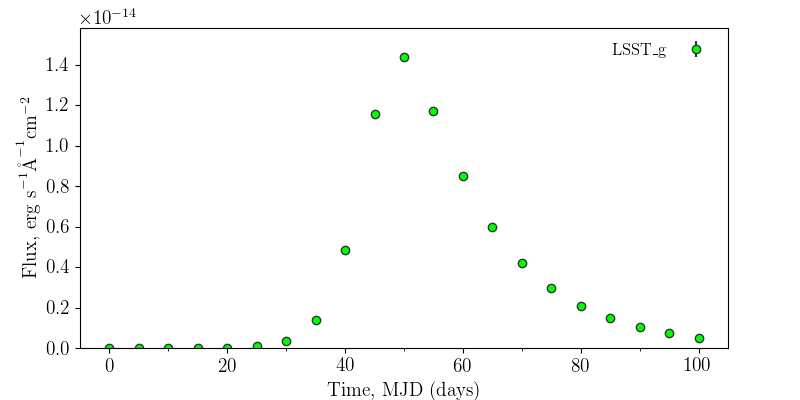

In [7]:
sn_sim.plot_lc(multiplot = False)

## Let's Compare

<IPython.core.display.Javascript object>


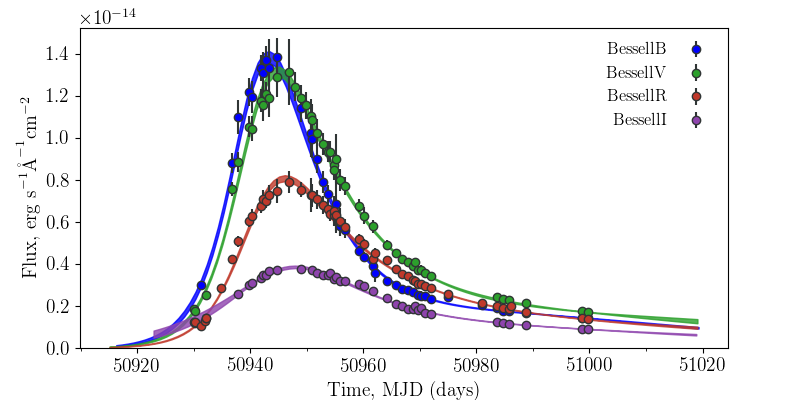

In [8]:
sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit(os.path.join(pcc.defaults._default_recon_dir_path, snname + ".dat"))

sn.plot_lc(multiplot=False)

<IPython.core.display.Javascript object>


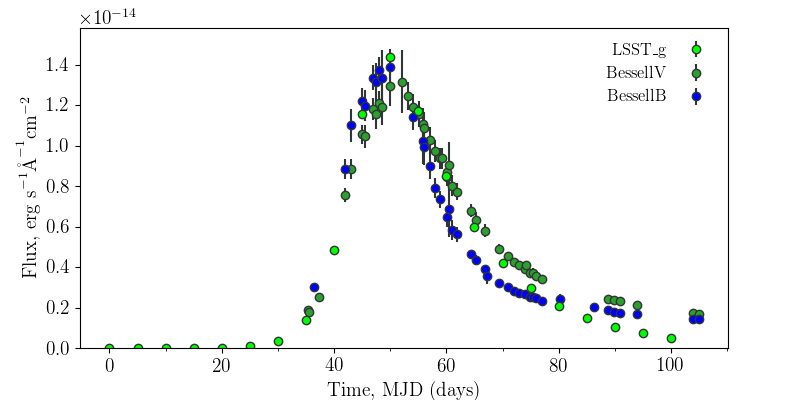

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.6-py3.6.egg/pycoco/classes.py:2865: UserWarning: Returning figure, saveargs will be ignored
  warnings.warn("Returning figure, saveargs will be ignored")


In [9]:
mjdmax_bessellV = pcc.utils.get_mjdmax(sn, "BessellV")

fig = sn_sim.plot_lc(multiplot = False, return_figure=True)

ax = fig.add_subplot(111)
ax.errorbar(sn.phot.data["BessellV"]["MJD"] - mjdmax_bessellV + 50, sn.phot.data["BessellV"]["flux"],
            yerr = sn.phot.data["BessellV"]["flux_err"], capsize = 0, fmt = 'o',
            color = pcc.colours.hex["BessellV"], ecolor = pcc.colours.hex['batman'], mec = pcc.colours.hex["batman"],
            zorder = -99, label=r"$\rm{BessellV}$")
ax.errorbar(sn.phot.data["BessellB"]["MJD"] - mjdmax_bessellV + 50, sn.phot.data["BessellB"]["flux"],
            yerr = sn.phot.data["BessellB"]["flux_err"], capsize = 0, fmt = 'o',
            color = pcc.colours.hex["BessellB"], ecolor = pcc.colours.hex['batman'], mec = pcc.colours.hex["batman"],
            zorder = -99, label=r"$\rm{BessellB}$")
legend = ax.legend(loc = 'upper right', scatterpoints = 1, markerfirst = False,
                                              numpoints = 1, frameon = False, bbox_to_anchor=(1., 1.),
                                              fontsize = 12.)

# LSST-like LC
___

Rather than making a single band light curve that is sampled every 5 days, you probably want to simulate a realistic cadence, in more than one band. Luckily, there is an example for that too.

## Deep Drilling Fields

In [9]:
from astropy.table import Table

ddf_opsimpath = "data/ddf_opsimdf_fieldID2786_minion.csv"
# ddf_opsimpath = "data/ddf_opsimdf_fieldID2786_fakerolling.csv"

t = Table.read(ddf_opsimpath)

In [10]:
t[:5]

col0,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,visitTime,visitExpTime,finRank,FWHMeff,FWHMgeom,transparency,airmass,vSkyBright,filtSkyBrightness,rotSkyPos,rotTelPos,lst,altitude,azimuth,dist2Moon,solarElong,moonRA,moonDec,moonAlt,moonAZ,moonPhase,sunAlt,sunAz,phaseAngle,rScatter,mieScatter,moonIllum,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,count
int64,int64,int64,int64,int64,float64,float64,str1,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
1741,1742,1016,55,2786,2.624318,0.049506,z,187620,59582.171539,2,34.0,30.0,4.511196,1.352636,1.163867,0.0,2.222344,20.982685,18.832685,2.064239,-0.137213,1.636682,0.466741,1.204748,2.3627,130.744924,5.064273,-0.438498,-0.566314,3.449093,0.402433,-0.629238,3.342671,172.725704,358865.561648,583.018077,1.8e-05,0.0,137.843451,0.697012,0.0,0.0,0.049428,4.344149,22.310566,2.61667263311,0.023055,0
2062,2063,1016,56,2786,2.624318,0.049506,u,200809,59582.324188,2,34.0,30.0,1.222222,1.388642,1.193464,0.0,1.194262,21.435116,22.095116,3.084543,0.0,2.598431,0.992397,0.065969,2.412413,130.899224,5.123375,-0.435914,-0.440278,2.523493,0.647246,-0.384235,2.374332,170.77095,370227.198416,494.848914,2.1e-05,0.0,90.86835,0.893342,0.0,0.0,1.467065,140.0,22.881148,2.61667263311,0.023055,1
2063,2064,1016,56,2786,2.624318,0.049506,u,200845,59582.324605,2,34.0,30.0,9.738095,1.582482,1.3528,0.0,1.193798,21.435439,22.095439,3.28081,0.176237,2.601056,0.992993,0.042803,2.41254,130.899644,5.12353,-0.435913,-0.43904,2.521431,0.648008,-0.376615,2.364827,170.765506,370256.105008,494.641702,2.1e-05,0.0,90.841262,1.036763,0.0,0.0,0.0,2.0,22.739598,2.61667263311,0.023055,2
2064,2065,1016,56,2786,2.624318,0.049506,u,200881,59582.325021,2,34.0,30.0,9.738095,1.38163,1.1877,0.0,1.193727,21.435489,22.095489,3.28081,0.172088,2.603681,0.993085,0.038005,2.412667,130.900064,5.123685,-0.435911,-0.4378,2.519372,0.648771,-0.375029,2.362873,170.760062,370284.994855,494.434691,2.1e-05,0.0,90.837101,0.888389,0.0,0.0,0.0,2.0,22.887015,2.61667263311,0.023055,3
2065,2066,1016,56,2786,2.624318,0.049506,u,200917,59582.325438,2,34.0,30.0,9.738095,1.381587,1.187665,0.0,1.193664,21.435533,22.095533,3.28081,0.167937,2.606306,0.993165,0.033206,2.412794,130.900484,5.12384,-0.43591,-0.436555,2.517318,0.649534,-0.37344,2.360922,170.754617,370313.867923,494.227881,2.1e-05,0.0,90.833435,0.888389,0.0,0.0,0.0,2.0,22.887092,2.61667263311,0.023055,4


In [11]:
w = np.where(t["night"] < 356)

t_y1 = t[w] ## just consider the first year

In [12]:
snname = "SN1998bw"             ## Name of the SN Template to use
mjdmax = 90                     ## Time that peak set by specphase() occurs at, relative to the first observation
mjd_obs = t_y1["expMJD"]-np.nanmin(t_y1["expMJD"])
                                                                                        ## The filters must be a np array of
filter_obs = np.array([pcc.utils.b("LSST_"+filter_name) for filter_name in t_y1["filter"]]) ## bytestrings
                                                                             
z_sim = info.get_sn_info(snname)["z_distmod"] ## simulate at the same redshift as before

absmag_offset = 0.0
EBV_MW = 0.0
EBV_host = 0.0
R_v = 3.1

In [13]:
flux, flux_err = coco.simulate(pcc.utils.b(snname),
                               z_sim, 
                               absmag_offset, 
                               EBV_MW, EBV_host, R_v,
                               mjdmax, mjd_obs,
                               filter_obs)

In [14]:
sn_sim = pcc.classes.SNClass("SN1998bw")
sn_sim.load_phot(phot_table = pcc.utils.simulate_out_to_ap_table(mjd_obs, flux, flux_err, filter_obs))
sn_sim.phot.data

OrderedDict([('LSST_u', <Table length=200>
                   MJD         flux  flux_err filter
                 float64     float64 float64   str6 
              -------------- ------- -------- ------
              0.152648999996     nan      0.0 LSST_u
              0.153065999999     nan      0.0 LSST_u
              0.153481999994     nan      0.0 LSST_u
              0.153898999997     nan      0.0 LSST_u
                    0.154316     nan      0.0 LSST_u
              0.154731999995     nan      0.0 LSST_u
              0.155148999998     nan      0.0 LSST_u
              0.155565999994     nan      0.0 LSST_u
              0.155981999997     nan      0.0 LSST_u
                    0.156399     nan      0.0 LSST_u
                         ...     ...      ...    ...
                  121.895426     nan      0.0 LSST_u
                  121.895842     nan      0.0 LSST_u
                  121.896259     nan      0.0 LSST_u
                  121.896676     nan      0.0 LSST_u
   

<IPython.core.display.Javascript object>


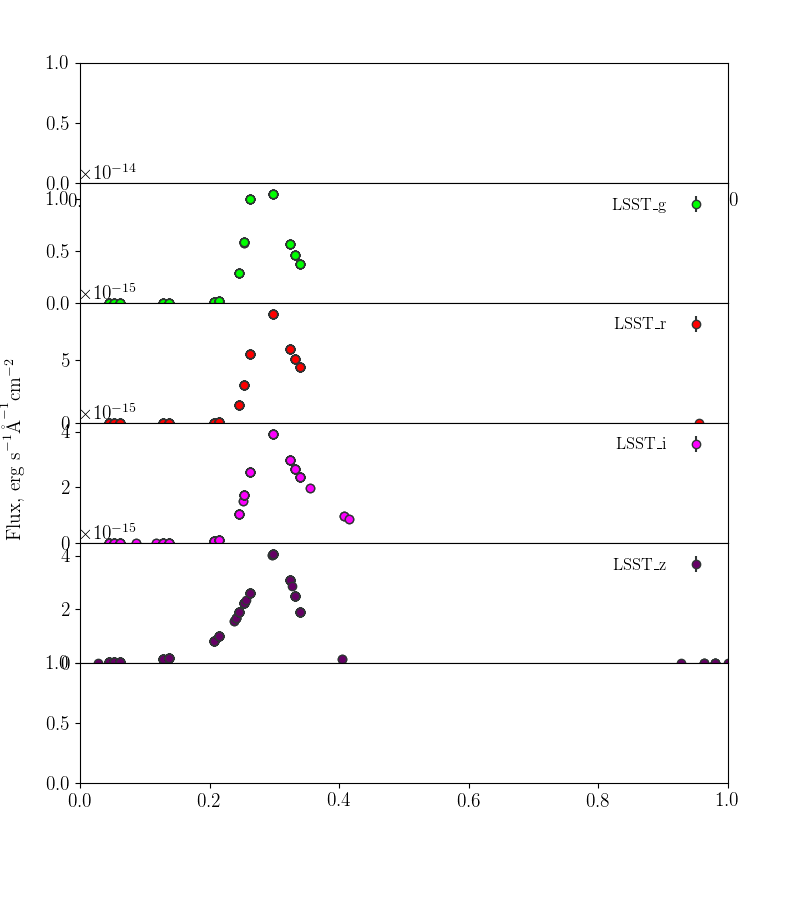

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/classes.py:2922: UserWarning: Filter 'LSST_u' not found
  warnings.warn("Filter '" + filter_key + "' not found")
/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/classes.py:2922: UserWarning: Filter 'LSST_y' not found
  warnings.warn("Filter '" + filter_key + "' not found")


In [15]:
sn_sim.plot_lc()

## Wide-Fast-Deep Fields
___

In [16]:
from astropy.table import Table

ddf_opsimpath = "data/wfd_opsimdf_fieldID1000_minion.csv"
# ddf_opsimpath = "data/wfd_opsimdf_fieldID1000_fakerolling.csv"


t = Table.read(ddf_opsimpath)

In [17]:
t[:5]

col0,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,visitTime,visitExpTime,finRank,FWHMeff,FWHMgeom,transparency,airmass,vSkyBright,filtSkyBrightness,rotSkyPos,rotTelPos,lst,altitude,azimuth,dist2Moon,solarElong,moonRA,moonDec,moonAlt,moonAZ,moonPhase,sunAlt,sunAz,phaseAngle,rScatter,mieScatter,moonIllum,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,count
int64,int64,int64,int64,int64,float64,float64,str1,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
127638,127633,1016,54,1000,5.718053,-0.674641,g,14965194,59753.208268,173,34.0,30.0,4.534648,1.160634,1.006041,0.25,1.370996,21.322956,21.732956,1.577808,-0.083137,4.809765,0.817444,2.021122,1.253452,130.682324,0.454572,0.14842,-0.382476,1.620863,28.682174,-1.438846,2.679445,115.236557,265138.55345,22623.620359,0.000962,0.0,100.757384,0.70404,0.0,0.0,0.048198,4.6924,24.241311,5.74249817398,-0.661415,0
127675,127670,1016,54,1000,5.718053,-0.674641,g,14966692,59753.225609,173,34.0,30.0,6.563181,1.303756,1.123687,0.25,1.274001,21.381891,21.791891,1.577013,-0.021499,4.91902,0.902585,2.013425,1.257471,130.696484,0.458472,0.150266,-0.292395,1.565339,28.524361,-1.376122,2.187149,115.436644,264595.61803,22325.704195,0.000954,0.0,95.433921,0.859973,0.0,0.0,0.048198,4.965574,24.160844,5.74249817398,-0.661415,1
136953,136947,1016,54,1000,5.718053,-0.674641,z,16353504,59769.276675,189,34.0,30.0,4.518763,0.695528,0.623724,0.0,1.025141,20.628852,19.037479,1.309337,0.400184,5.516,1.348874,2.347508,1.617649,142.925846,3.864375,-0.264902,0.064601,4.443167,73.578316,-1.119961,1.766269,61.863982,243334.483068,6805.951436,0.006269,110.348836,80.601314,0.50461,0.0,0.0,0.053179,4.834432,23.21587,5.70338589561,-0.654803,2
136999,136993,1016,54,1000,5.718053,-0.674641,z,16355480,59769.299544,189,34.0,30.0,7.951576,0.659361,0.593995,0.0,1.012049,20.812797,19.223263,0.893367,0.559059,5.660088,1.416337,2.840454,1.61247,142.942179,3.87008,-0.266483,-0.048607,4.372316,73.808215,-0.99724,1.662396,61.564816,243229.589456,6923.206091,0.00632,81.418639,79.772684,0.46239,0.0,0.0,0.048077,6.938272,23.36435,5.70338589561,-0.654803,3
137996,137990,1016,54,1000,5.718053,-0.674641,y,16439213,59770.268672,190,34.0,30.0,4.450165,0.782293,0.695045,0.0,1.030291,20.084155,17.3,1.83111,0.837478,5.482783,1.327713,2.28205,1.38291,143.618923,4.10871,-0.351456,0.338353,4.493347,83.010265,-1.162021,1.817678,48.684468,250824.336567,14761.407647,0.008886,234.429486,80.925908,0.633086,0.0,0.0,0.085461,5.469654,21.767917,5.70827493041,-0.654803,4


In [18]:
w = np.where(t["night"] < 356)

t_y1 = t[w] ## just consider the first year

In [19]:
snname = "SN1998bw"             ## Name of the SN Template to use
mjdmax = 90                     ## Time that peak set by specphase() occurs at, relative to the first observation
mjd_obs = t_y1["expMJD"]-np.nanmin(t_y1["expMJD"])
                                                                                        ## The filters must be a np array of
filter_obs = np.array([pcc.utils.b("LSST_"+filter_name) for filter_name in t_y1["filter"]]) ## bytestrings
                                                                             
z_sim = info.get_sn_info(snname)["z_distmod"] ## simulate at the same redshift as before

absmag_offset = 0.0
EBV_MW = 0.0
EBV_host = 0.0
R_v = 3.1

In [20]:
flux, flux_err = coco.simulate(pcc.utils.b(snname),
                               z_sim, 
                               absmag_offset, 
                               EBV_MW, EBV_host, R_v,
                               mjdmax, mjd_obs,
                               filter_obs)

In [21]:
sn_sim = pcc.classes.SNClass("SN1998bw")
sn_sim.load_phot(phot_table = pcc.utils.simulate_out_to_ap_table(mjd_obs, flux, flux_err, filter_obs))
sn_sim.phot.data

OrderedDict([('LSST_u', <Table length=4>
                 MJD      flux  flux_err filter
               float64  float64 float64   str6 
              --------- ------- -------- ------
              37.900045     nan      0.0 LSST_u
              64.835241     nan      0.0 LSST_u
              97.916771     nan      0.0 LSST_u
                151.873     nan      0.0 LSST_u), ('LSST_g', <Table length=4>
                    MJD              flux       flux_err filter
                  float64          float64      float64   str6 
              --------------- ----------------- -------- ------
                          0.0 1.91700282574e-24      0.0 LSST_g
              0.0173409999989 1.92608023001e-24      0.0 LSST_g
                    54.861819  5.9338071869e-18      0.0 LSST_g
                    54.877172 5.95867616752e-18      0.0 LSST_g), ('LSST_r',
              <Table length=10>
                 MJD            flux       flux_err filter
               float64        float64    

<IPython.core.display.Javascript object>


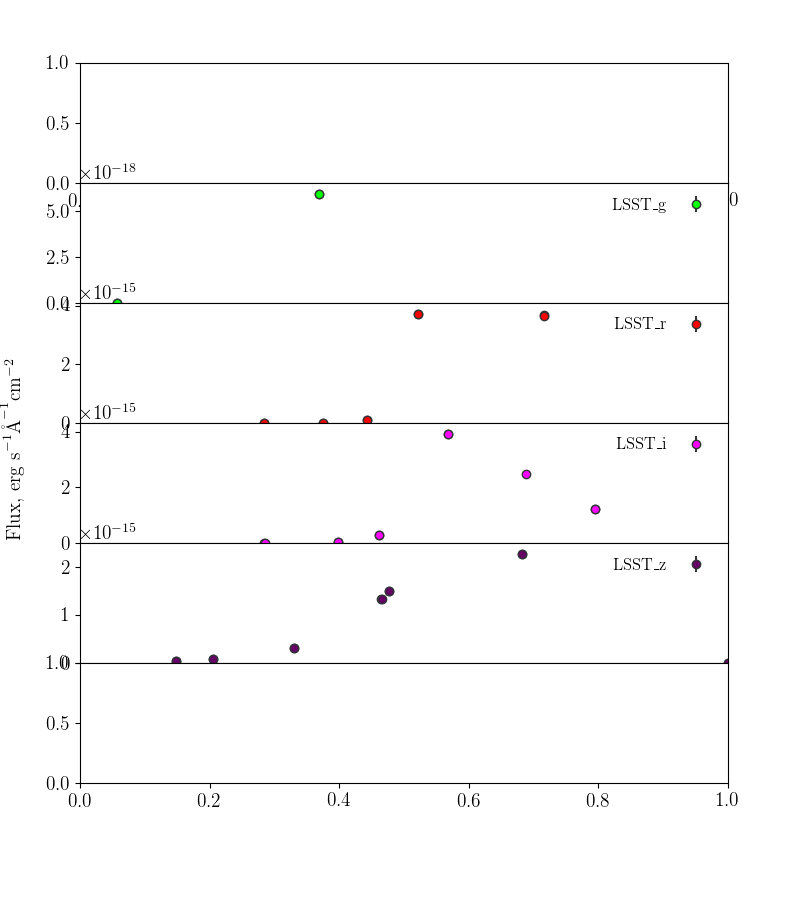

/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/classes.py:2922: UserWarning: Filter 'LSST_u' not found
  warnings.warn("Filter '" + filter_key + "' not found")
/Users/berto/anaconda3/lib/python3.6/site-packages/pycocosn-0.9.17-py3.6.egg/pycoco/classes.py:2922: UserWarning: Filter 'LSST_y' not found
  warnings.warn("Filter '" + filter_key + "' not found")


In [22]:
sn_sim.plot_lc()

## Exporting
____

You can take a bit more of a look at the PhotometryClass and SNClass in [./3 - pycoco_SNClass.ipynb](./3 - pycoco_SNClass.ipynb)[]()